<a href="https://colab.research.google.com/github/pylypen/robotdreams_cv2/blob/main/homework_11/Homework.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# HOMEWORK 11

In this homework you are going to improve the DNN for house price estimation we built during the lesson. The objective is to beat the performance (i.e. to get a closer estimation) of the last network we built in the lecture.

The structure of this homework is as follows:
 * First, we are going to build the reference network (exactly the same network we implemented in the lecture).
 * You are going to run it a write down the price estimation error (Validation MAE).
 * Then you are going to make some modifications in order to make the network perform better.
 
In the section **Tasks** you will find what modification you'll need to implement as well as some hints.
 
At the end, as usual, there are some question waiting for you to answer :-)

In [2]:
import cv2
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
plt.rcParams['figure.figsize'] = [15, 10]

from tensorflow.keras import Model, metrics
from tensorflow.keras.layers import Dense, Dropout, Input

# Set the seeds
from numpy.random import seed
from tensorflow.random import set_seed
seed_value = 1234578790
seed(seed_value)
set_seed(seed_value)

### Data Preparation

Let's load the data and prepare the training sets.

In [3]:
dataset = pd.read_csv('train.csv')

features = ['SalePrice','OverallQual', 'GrLivArea', 'FullBath', 'YearBuilt', 'LotArea']
data = dataset[features]

# Filling nan with the mean of the column:
data = data.fillna(data.mean())

# Extract input values and normalize
x = data[features[1:]]
scale = StandardScaler()
x = scale.fit_transform(x)

# Extract output values (prices) and normalize
y = data[features[0]].values
y = y/100000

# Split into 75% for train and 25% for test
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=seed_value)

Let's use the same plotting helper we used in the lecture.

In [4]:
def plot_history(history):
    h = history.history
    epochs = range(len(h['loss']))

    plt.subplot(121), plt.plot(epochs, h['loss'], '.-', epochs, h['val_loss'], '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('loss')
    plt.legend(['Train', 'Validation'])
    plt.subplot(122), plt.plot(epochs, np.array(h['mean_absolute_error'])*1e5, '.-',
                               epochs, np.array(h['val_mean_absolute_error'])*1e5, '.-')
    plt.grid(True), plt.xlabel('epochs'), plt.ylabel('MAE')
    plt.legend(['Train', 'Validation'])
        
    print('Train MAE     ', h['mean_absolute_error'][-1]*1e5)
    print('Validation MAE', h['val_mean_absolute_error'][-1]*1e5)

### Building the Network

In [5]:
inputs = Input(shape=x.shape[1])
outputs = Dense(20, activation='relu')(inputs)
outputs = Dense(20, activation='relu')(outputs)
outputs = Dense(20, activation='relu')(outputs)
outputs = Dense(20, activation='relu')(outputs)
outputs = Dense(20, activation='relu')(outputs)
outputs = Dense(20, activation='relu')(outputs)
outputs = Dense(20, activation='relu')(outputs)
outputs = Dense(1, activation='linear')(outputs)
model = Model(inputs, outputs)

model.compile(optimizer ='adam', loss ='mean_squared_error', metrics =[metrics.mae])
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 5)]               0         
                                                                 
 dense (Dense)               (None, 20)                120       
                                                                 
 dense_1 (Dense)             (None, 20)                420       
                                                                 
 dense_2 (Dense)             (None, 20)                420       
                                                                 
 dense_3 (Dense)             (None, 20)                420       
                                                                 
 dense_4 (Dense)             (None, 20)                420       
                                                                 
 dense_5 (Dense)             (None, 20)                420   

### Training the Network

Train MAE      17321.212589740753
Validation MAE 21720.583736896515


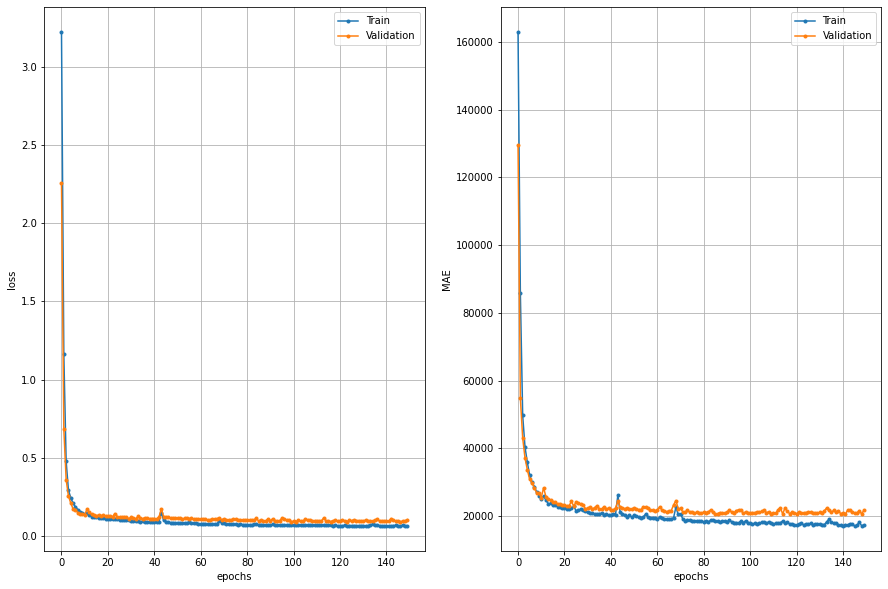

In [6]:
history = model.fit(x_train, y_train, validation_data=(x_test,y_test), epochs=150, batch_size=64, verbose=0)
plot_history(history)

### Tasks

Improve the network so you obtain a better estimation error than the reference. You can try the following:
* Add a new feature to your inputs. For instance, `LotArea` (lot size in square feet) seems like a good candidate :-)
* Try increasing the number of neurons in the first layer. Currently, we have 5 neurons there, what happens if we increase it to 10?

### Questions
* What is the new price estimation error after your modifrications? Is it better than before?
* Does adding more features help?
* Does adding more neurons help?
* What would you do to improv the network even further?

## Answers
  - It's better but not so much
  - Yes
  - Yes
  - I think need convert sting value from columns to int value, after that we can get more features